# 1. Complementation

## 1.1.1 compare between shiping et al and our methods.

In [1]:
from zzd.utils.assess import roc_curve_kfold,pr_curve_kfold,pr_curve,roc_curve,multi_scores
import numpy as np
import numpy as np
from sklearn import metrics
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt

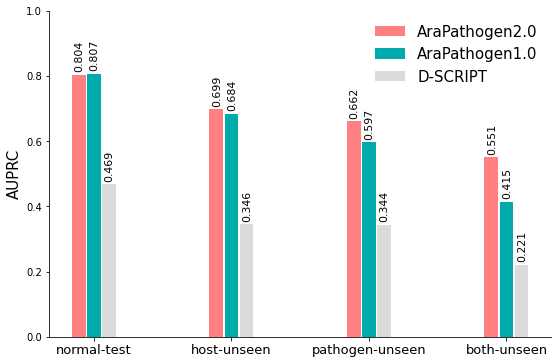

In [2]:
AraPathogen2_c1  = []
AraPathogen2_c2h = []
AraPathogen2_c2p = []
AraPathogen2_c3  = []

AraPathogen1_c1 = []
AraPathogen1_c2h = []
AraPathogen1_c2p = []
AraPathogen1_c3 = []

DSCRIPT_c1 = []
DSCRIPT_c2h = []
DSCRIPT_c2p = []
DSCRIPT_c3 = []

DeepHPI_c3 = []

for i in range(10):
    AraPathogen2_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c1_pred_{i}.txt")[:,-2:])
    AraPathogen2_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    AraPathogen2_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])
    AraPathogen2_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])
    
    AraPathogen1_c1.append(
         np.genfromtxt(f"./preds/feature_combine_10folds_RF_ac_ct_dpc_PSP_AraNetProperty/c1_pred_{i}.txt")[:,-2:])
    AraPathogen1_c2h.append(
         np.genfromtxt(f"./preds/feature_combine_10folds_RF_ac_ct_dpc_PSP_AraNetProperty/c2_host_unseen_pred_{i}.txt")[:,-2:])
    AraPathogen1_c2p.append(
         np.genfromtxt(f"./preds/feature_combine_10folds_RF_ac_ct_dpc_PSP_AraNetProperty/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])
    AraPathogen1_c3.append(
         np.genfromtxt(f"./preds/feature_combine_10folds_RF_ac_ct_dpc_PSP_AraNetProperty/c3_pred_{i}.txt")[:,-2:])
    
    DSCRIPT_c1.append(
        np.genfromtxt(f"./dscript_preds/C1_fold{i}_test.predictions.tsv")[:,-2:])
    DSCRIPT_c2h .append(
        np.genfromtxt(f"./dscript_preds/C2h_fold{i}.predictions.tsv")[:,-2:])
    DSCRIPT_c2p .append(
        np.genfromtxt(f"./dscript_preds/C2p_fold{i}.predictions.tsv")[:,-2:])
    DSCRIPT_c3 .append(
        np.genfromtxt(f"./dscript_preds/C3_fold{i}.predictions.tsv")[:,-2:])
    
    DeepHPI_c3.append(
        np.genfromtxt(f"./deepHPI_preds/c3_fold{i}_pred.txt")[:,-2:])

data = [
    AraPathogen2_c1  ,
    AraPathogen2_c2h ,
    AraPathogen2_c2p ,
    AraPathogen2_c3  ,

    AraPathogen1_c1  ,
    AraPathogen1_c2h ,
    AraPathogen1_c2p ,
    AraPathogen1_c3  ,
    
    DSCRIPT_c1,
    DSCRIPT_c2h ,
    DSCRIPT_c2p ,
    DSCRIPT_c3 ,
    
    DeepHPI_c3
       ]

AuPRCs = []
for i in range(3):
    AuPRC = []
    for j in np.arange(i*4,(i+1)*4):
        tmp = np.mean([multi_scores(data[j][_][:,0],data[j][_][:,1])[-2] for _ in range(10)])
        AuPRC.append(tmp)
    AuPRCs.append(AuPRC)
    
    


fig,ax = plt.subplots(1,1,figsize=(9,6))

#set title
ax.set_title("",fontdict={"fontsize":15},y=1.05)
ax.set_xlabel("",fontdict={"fontsize":15})
ax.set_ylabel("AUPRC",fontdict={"fontsize":15})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
    
#plot
ax.set_ylim(0,1)
# ax.set_title("The performance of different methods")


labels = ['AraPathogen2.0',
          'AraPathogen1.0',
          'D-SCRIPT'
         ]

ax.set_xticks(np.arange(4))
ax.set_xticklabels(('normal-test', 'host-unseen', 'pathogen-unseen', 'both-unseen'),fontdict={"fontsize":13},
                   rotation=0)

colors = ["#FF8080","#FFABAB","#FFDBDB",'#008080','#00ABAB','#00DBDB']
colors = ["#FF8080",'#00ABAB',"#DBDBDB"]
for i in range(3):
    ax.bar(np.arange(4)+0.11*(i-1),AuPRCs[i],width=0.1,label=labels[i],color=colors[i])



for index in range(3):
    for i,j in zip(np.arange(4),AuPRCs[index]):
        ax.text(i+0.11*(index-1-0.3),j+0.015,f"{j:.3f}",fontdict={"fontsize":11},rotation=90) 


# plt.legend(fontsize=15,shadow=False,framealpha=0)
# plt.legend(fontsize=15,shadow=False,framealpha=0, bbox_to_anchor=(1.0, -0.05, ),ncol=2)
plt.legend(fontsize=15,shadow=False,framealpha=0,)
# plt.legend(fontsize=15,shadow=False,framealpha=0, bbox_to_anchor=(1.01, -0.05, ),ncol=3)
plt.savefig('./pics/Figure2_B_methods_comparation.svg', dpi=600,bbox_inches = 'tight',format="svg")

In [3]:
# scs = []
# for i in range(13):
#     sc = np.mean([multi_scores(data[i][_][:,0],data[i][_][:,1],threshold=0.1)  
#               for _ in range(10) ],0)
#     scs.append(sc)
    
# print(f"TP\tTN\tFP\tFN\tprecision\trecall\tspecificity\tAcc\tmcc\tf1\tAUROC\tAUPRC\tAP")
# print(f"TP\tTN\tFP\tFN\tPPV\tTPR\tTNR\tAcc\tmcc\tf1\tAUROC\tAUPRC\tAP")
# fmat =  [1, 1,  1,  1,  3,  3,  3,  3,  3,  3,  3, 3,3]
# for i in [0,4,8,  1,5,9,  2,6,10,  3,7,11,12,]:
#     sc = scs[i]
#     line = '\t'.join([ f'{a:.{_}f}' for (_,a) in zip(fmat,sc)])
#     print(line)


In [4]:
# scs = []
# for i in range(13):
#     sc = np.mean([multi_scores(data[i][_][:,0],data[i][_][:,1],threshold=0.1)  
#               for _ in range(10) ],0)
#     scs.append(sc[np.array([4,5,6,7,8,9,10,11])])
# scs = np.array(scs)

# fig,ax = plt.subplots(1,1,figsize=(9,6))

# #set title
# ax.set_title("",fontdict={"fontsize":15},y=1.05)
# ax.set_xlabel("",fontdict={"fontsize":15})
# ax.set_ylabel("",fontdict={"fontsize":15})

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # ax.spines['left'].set_visible(False)
# # ax.spines['bottom'].set_visible(False)
    
# #plot
# ax.set_ylim(0,1)
# # ax.set_title("The performance of different methods")


# labels = ['normal-test', 'host-unseen', 'pathogen-unseen', 'both-unseen'         ]

# ax.set_xticks(np.arange(8))
# ax.set_xticklabels(('precision', 'recall', 'specificity', 'Acc',"MCC","F1","AUROC","AUPRC"),fontdict={"fontsize":13},
#                    rotation=0)

# colors = ["#FF8080","#FFABAB","#FFDBDB",'#008080','#00ABAB','#00DBDB']
# # colors = ["#FF8080",'#00ABAB',"#DBDBDB"]
# for i in range(4):
#     ax.bar(np.arange(8)+0.15*(i-1),scs[i],width=0.15,label=labels[i],color=colors[i])
# # ax.bar(np.arange(8),scs[0])


# # for index in range(4):
#     # for i,j in zip(np.arange(8),scs[index]):
#         # ax.text(i+0.15*(index-1)-0.05,j+0.015,f"{j:.3f}",fontdict={"fontsize":7},rotation=90) 


# # plt.legend(fontsize=15,shadow=False,framealpha=0)
# # plt.legend(fontsize=15,shadow=False,framealpha=0, bbox_to_anchor=(1.0, -0.05, ),ncol=2)
# # plt.legend(fontsize=15,shadow=False,framealpha=0,)
# # plt.legend(fontsize=15,shadow=False,framealpha=0, bbox_to_anchor=(1.01, -0.05, ),ncol=3)
# # plt.savefig('./pics/Figure2_A_methods_comparation.svg', dpi=600,bbox_inches = 'tight',format="svg")

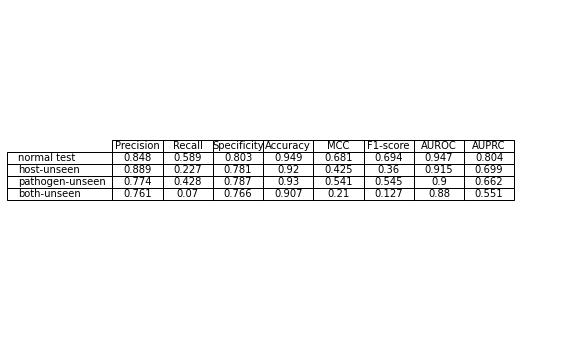

In [5]:
scs = []
for i in range(13):
    sc = np.mean([multi_scores(data[i][_][:,0],data[i][_][:,1],threshold=0.1)  
              for _ in range(10) ],0)
    scs.append(sc[np.array([4,5,6,7,8,9,10,11])])
scs = np.array(scs)

fig,ax = plt.subplots(1,1,figsize=(9,6))


col_labels = ['Precision', 'Recall', 'Specificity', 'Accuracy','MCC',"F1-score","AUROC","AUPRC"]
row_labels = ['normal test','host-unseen','pathogen-unseen','both-unseen']
table = ax.table(cellText=np.around(scs[:4],3),rowLabels=row_labels, colLabels=col_labels,  colWidths=[0.1]*8,loc='center',
                  cellLoc='center', )
table.auto_set_font_size(False)


plt.axis('off')
plt.savefig('./pics/Figure2_A_performance.svg', dpi=600,bbox_inches = 'tight',format="svg")

# 1.2 Model Ablation

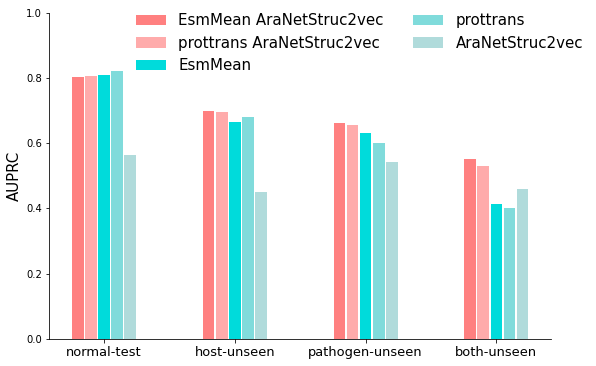

In [15]:
C1223_RF_EsmMean_c1  = []
C1223_RF_EsmMean_c2h = []
C1223_RF_EsmMean_c2p = []
C1223_RF_EsmMean_c3  = []

C1223_RF_prottrans_c1  = []
C1223_RF_prottrans_c2h = []
C1223_RF_prottrans_c2p = []
C1223_RF_prottrans_c3  = []

C1223_RF_AraNetStruc2vec_c1  = []
C1223_RF_AraNetStruc2vec_c2h = []
C1223_RF_AraNetStruc2vec_c2p = []
C1223_RF_AraNetStruc2vec_c3  = []


C1223_RF_EsmMean_prottrans_c1  = []
C1223_RF_EsmMean_prottrans_c2h = []
C1223_RF_EsmMean_prottrans_c2p = []
C1223_RF_EsmMean_prottrans_c3  = []

C1223_RF_EsmMean_AraNetStruc2vec_c1  = []
C1223_RF_EsmMean_AraNetStruc2vec_c2h = []
C1223_RF_EsmMean_AraNetStruc2vec_c2p = []
C1223_RF_EsmMean_AraNetStruc2vec_c3  = []

C1223_RF_prottrans_AraNetStruc2vec_c1  = []
C1223_RF_prottrans_AraNetStruc2vec_c2h = []
C1223_RF_prottrans_AraNetStruc2vec_c2p = []
C1223_RF_prottrans_AraNetStruc2vec_c3  = []


C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c1  = []
C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c2h = []
C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c2p = []
C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c3  = []


for i in range(10):
    C1223_RF_EsmMean_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_EsmMean_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean/c3_pred_{i}.txt")[:,-2:])

    C1223_RF_prottrans_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_prottrans_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_prottrans_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_prottrans_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans/c3_pred_{i}.txt")[:,-2:])
    
    C1223_RF_AraNetStruc2vec_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetStruc2vec/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_AraNetStruc2vec_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetStruc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_AraNetStruc2vec_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetStruc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_AraNetStruc2vec_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])    

    
    C1223_RF_EsmMean_prottrans_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_prottrans/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_prottrans_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_prottrans/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_prottrans_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_prottrans/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_EsmMean_prottrans_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_prottrans/c3_pred_{i}.txt")[:,-2:])        
 
    C1223_RF_EsmMean_AraNetStruc2vec_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_AraNetStruc2vec_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_AraNetStruc2vec_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_EsmMean_AraNetStruc2vec_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])  
    
    C1223_RF_prottrans_AraNetStruc2vec_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans_AraNetStruc2vec/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_prottrans_AraNetStruc2vec_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans_AraNetStruc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_prottrans_AraNetStruc2vec_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans_AraNetStruc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_prottrans_AraNetStruc2vec_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])  
    
    C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_prottrans_AraNetStruc2vec/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_prottrans_AraNetStruc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_prottrans_AraNetStruc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_prottrans_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])

    
data = [
C1223_RF_EsmMean_AraNetStruc2vec_c1 , 
C1223_RF_EsmMean_AraNetStruc2vec_c2h ,
C1223_RF_EsmMean_AraNetStruc2vec_c2p ,
C1223_RF_EsmMean_AraNetStruc2vec_c3  ,
 
C1223_RF_prottrans_AraNetStruc2vec_c1 , 
C1223_RF_prottrans_AraNetStruc2vec_c2h ,
C1223_RF_prottrans_AraNetStruc2vec_c2p ,
C1223_RF_prottrans_AraNetStruc2vec_c3  ,

C1223_RF_EsmMean_c1 , 
C1223_RF_EsmMean_c2h ,
C1223_RF_EsmMean_c2p ,
C1223_RF_EsmMean_c3  ,
    

C1223_RF_prottrans_c1 , 
C1223_RF_prottrans_c2h ,
C1223_RF_prottrans_c2p ,
C1223_RF_prottrans_c3  ,

    
C1223_RF_AraNetStruc2vec_c1 , 
C1223_RF_AraNetStruc2vec_c2h ,
C1223_RF_AraNetStruc2vec_c2p ,
C1223_RF_AraNetStruc2vec_c3  ,
    




C1223_RF_EsmMean_prottrans_c1 , 
C1223_RF_EsmMean_prottrans_c2h ,
C1223_RF_EsmMean_prottrans_c2p ,
C1223_RF_EsmMean_prottrans_c3  ,


C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c1 , 
C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c2h ,
C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c2p ,
C1223_RF_EsmMean_prottrans_AraNetStruc2vec_c3  ,
]

# AuPRCs = []
# for i in range(7):
#     AuPRC = []
#     for j in np.arange(i*4,(i+1)*4):
#         tmp = np.mean([multi_scores(data[j][_][:,0],data[j][_][:,1])[-2] for _ in range(10)])
#         AuPRC.append(tmp)
#     AuPRCs.append(AuPRCs)
    

AuPRCs = []
for i in range(5):
    AuPRC = []
    for j in np.arange(i*4,(i+1)*4):
        tmp = np.mean([multi_scores(data[j][_][:,0],data[j][_][:,1])[-2] for _ in range(10)])
        AuPRC.append(tmp)
        
    AuPRCs.append(AuPRC)
    
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(9,6))

#set title
# ax.set_title("Model Ablation",fontdict={"fontsize":15},y=1.05)
ax.set_xlabel("",fontdict={"fontsize":15})
ax.set_ylabel("AUPRC",fontdict={"fontsize":15})
ax.set_ylim(0,1)
ax.set_xticks(np.arange(4))
ax.set_xticklabels(('normal-test', 'host-unseen', 'pathogen-unseen', 'both-unseen'),fontdict={"fontsize":13},
                   rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
labels = ["EsmMean AraNetStruc2vec",
          "prottrans AraNetStruc2vec",
          "EsmMean",
          "prottrans",
          "AraNetStruc2vec",
          "EsmMean prottrans",
          "EsmMean prottrans AraNetStruc2vec"]

colors = ["#FF8080","#FFABAB",
          "#00DBDB","#80DBDB",'#B0DBDB',
          '#00DBDB','#00ABAB','#008080',
          ]
for i in np.arange(0,5):
    ax.bar(np.arange(4)+0.1*i-0.2,AuPRCs[i],width=0.09,label=labels[i],color=colors[i])

plt.legend(fontsize=15,shadow=False,framealpha=0, bbox_to_anchor=(1.09, 1.04, ),ncol=2)
# plt.legend(fontsize=15,shadow=False,framealpha=0 ,ncol=2)
plt.savefig('./pics/Figure2_F_Ablation.svg', dpi=600,bbox_inches = 'tight',format="svg")

# 1.3 comparation of sequeces base encode

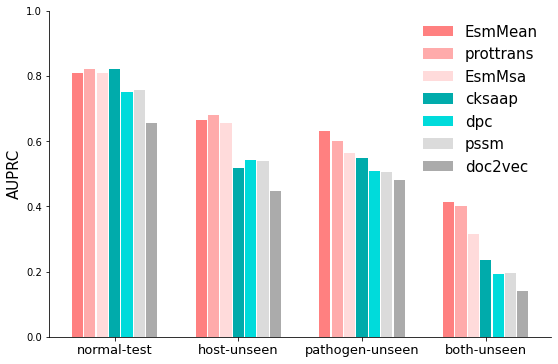

In [7]:
C1223_RF_EsmMean_c1  = []
C1223_RF_EsmMean_c2h = []
C1223_RF_EsmMean_c2p = []
C1223_RF_EsmMean_c3  = []

C1223_RF_prottrans_c1  = []
C1223_RF_prottrans_c2h = []
C1223_RF_prottrans_c2p = []
C1223_RF_prottrans_c3  = []

C1223_RF_EsmMsa_c1  = []
C1223_RF_EsmMsa_c2h = []
C1223_RF_EsmMsa_c2p = []
C1223_RF_EsmMsa_c3  = []

C1223_RF_doc2vec_c1  = []
C1223_RF_doc2vec_c2h = []
C1223_RF_doc2vec_c2p = []
C1223_RF_doc2vec_c3  = []

C1223_CNN_pssm_c1  = []
C1223_CNN_pssm_c2h = []
C1223_CNN_pssm_c2p = []
C1223_CNN_pssm_c3  = []

C1223_RF_dpc_c1  = []
C1223_RF_dpc_c2h = []
C1223_RF_dpc_c2p = []
C1223_RF_dpc_c3  = []

C1223_RF_cksaap_c1  = []
C1223_RF_cksaap_c2h = []
C1223_RF_cksaap_c2p = []
C1223_RF_cksaap_c3  = []



for i in range(10):
    C1223_RF_EsmMean_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMean_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_EsmMean_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean/c3_pred_{i}.txt")[:,-2:])

    C1223_RF_prottrans_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_prottrans_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_prottrans_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_prottrans_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_prottrans/c3_pred_{i}.txt")[:,-2:])
    
    C1223_RF_EsmMsa_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMsa/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMsa_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMsa/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_EsmMsa_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMsa/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_EsmMsa_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMsa/c3_pred_{i}.txt")[:,-2:])
    
    C1223_RF_doc2vec_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_doc2vec/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_doc2vec_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_doc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_doc2vec_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_doc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_doc2vec_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_doc2vec/c3_pred_{i}.txt")[:,-2:])        

    C1223_CNN_pssm_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_CNN_pssm/c1_pred_{i}.txt")[:,-2:])
    C1223_CNN_pssm_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_CNN_pssm/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_CNN_pssm_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_CNN_pssm/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_CNN_pssm_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_CNN_pssm/c3_pred_{i}.txt")[:,-2:])       

    C1223_RF_dpc_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_dpc/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_dpc_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_dpc/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_dpc_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_dpc/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_dpc_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_dpc/c3_pred_{i}.txt")[:,-2:])  

    C1223_RF_cksaap_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_cksaap/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_cksaap_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_cksaap/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_cksaap_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_cksaap/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_cksaap_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_cksaap/c3_pred_{i}.txt")[:,-2:])  
    
    
data = [
    C1223_RF_EsmMean_c1 , 
    C1223_RF_EsmMean_c2h ,
    C1223_RF_EsmMean_c2p ,
    C1223_RF_EsmMean_c3  ,

    C1223_RF_prottrans_c1 , 
    C1223_RF_prottrans_c2h ,
    C1223_RF_prottrans_c2p ,
    C1223_RF_prottrans_c3  ,

    C1223_RF_EsmMsa_c1  ,
    C1223_RF_EsmMsa_c2h ,
    C1223_RF_EsmMsa_c2p ,
    C1223_RF_EsmMsa_c3  ,



    C1223_CNN_pssm_c1  ,
    C1223_CNN_pssm_c2h ,
    C1223_CNN_pssm_c2p ,
    C1223_CNN_pssm_c3  ,

    C1223_RF_dpc_c1  ,
    C1223_RF_dpc_c2h ,
    C1223_RF_dpc_c2p ,
    C1223_RF_dpc_c3  ,

    C1223_RF_cksaap_c1,  
    C1223_RF_cksaap_c2h, 
    C1223_RF_cksaap_c2p ,
    C1223_RF_cksaap_c3,
    
    C1223_RF_doc2vec_c1  ,
    C1223_RF_doc2vec_c2h ,
    C1223_RF_doc2vec_c2p ,
    C1223_RF_doc2vec_c3  ]

AuPRCs = []
for i in range(7):
    AuPRC = []
    for j in np.arange(i*4,(i+1)*4):
        tmp = np.mean([multi_scores(data[j][_][:,0],data[j][_][:,1])[-2] for _ in range(10)])
        AuPRC.append(tmp)
        
    AuPRCs.append(AuPRC)

    
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(9,6))

#set title
# ax.set_title("Comparison of sequential encoder",fontdict={"fontsize":15},y=1.05)
ax.set_xlabel("",fontdict={"fontsize":15})
ax.set_ylabel("AUPRC",fontdict={"fontsize":15})
ax.set_ylim(0,1)
ax.set_xticks(np.arange(4))
ax.set_xticklabels(('normal-test', 'host-unseen', 'pathogen-unseen', 'both-unseen'),fontdict={"fontsize":13},
                   rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

labels = ["EsmMean","prottrans","EsmMsa",
          "cksaap","dpc","pssm",
          "doc2vec"]

colors = ["#FF8080","#FFABAB","#FFDBDB",
          '#00ABAB','#00DBDB','#DBDBDB',
          '#ABABAB']

for i in np.arange(0,7):
    ax.bar(np.arange(4)+0.1*i-0.3,AuPRCs[i],width=0.09,label=labels[i],color=colors[i])

# plt.legend(fontsize=15,shadow=False,framealpha=0, bbox_to_anchor=(1.0, -0.05, ),ncol=4)
plt.legend(fontsize=15,shadow=False,framealpha=0 )
plt.savefig('./pics/Figure2_D_sequential_encoder_comparation.svg', dpi=600,bbox_inches = 'tight',format="svg")

# 1.4 不同网络编码的比较

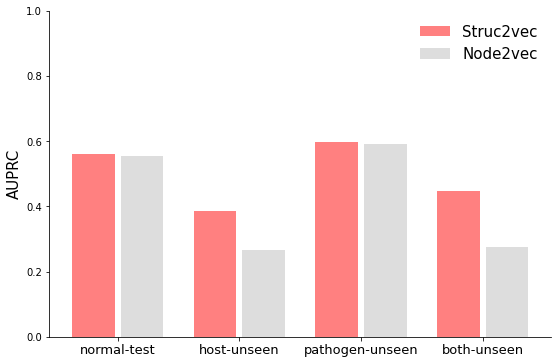

In [8]:
C1223_RF_AraNetStruc2vec_c1  = []
C1223_RF_AraNetStruc2vec_c2h = []
C1223_RF_AraNetStruc2vec_c2p = []
C1223_RF_AraNetStruc2vec_c3  = []

C1223_RF_AraNetNode2vec_c1 = []
C1223_RF_AraNetNode2vec_c2h = []
C1223_RF_AraNetNode2vec_c2p = []
C1223_RF_AraNetNode2vec_c3 = []

C1223_RF_AraNetProperty_c1 = []
C1223_RF_AraNetProperty_c2h = []
C1223_RF_AraNetProperty_c2p = []
C1223_RF_AraNetProperty_c3 = []

for i in range(5):
    C1223_RF_AraNetStruc2vec_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetStruc2vec/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_AraNetStruc2vec_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetStruc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_AraNetStruc2vec_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetStruc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    C1223_RF_AraNetStruc2vec_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])    
       
    C1223_RF_AraNetNode2vec_c1.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetNode2vec/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_AraNetNode2vec_c2h.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetNode2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_AraNetNode2vec_c2p.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetNode2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_AraNetNode2vec_c3.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetNode2vec/c3_pred_{i}.txt")[:,-2:])
    
    C1223_RF_AraNetProperty_c1.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetProperty/c1_pred_{i}.txt")[:,-2:])
    C1223_RF_AraNetProperty_c2h.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetProperty/c2_host_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_AraNetProperty_c2p.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetProperty/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])
    C1223_RF_AraNetProperty_c3.append(
         np.genfromtxt(f"./preds/10folds_C1223_RF_AraNetProperty/c3_pred_{i}.txt")[:,-2:])
    
data = [
    C1223_RF_AraNetStruc2vec_c1 ,
    C1223_RF_AraNetStruc2vec_c2h ,
    C1223_RF_AraNetStruc2vec_c2p ,
    C1223_RF_AraNetStruc2vec_c3 ,

    C1223_RF_AraNetNode2vec_c1 ,
    C1223_RF_AraNetNode2vec_c2h ,
    C1223_RF_AraNetNode2vec_c2p ,
    C1223_RF_AraNetNode2vec_c3 ,
    
    C1223_RF_AraNetProperty_c1 ,
    C1223_RF_AraNetProperty_c2h ,
    C1223_RF_AraNetProperty_c2p ,
    C1223_RF_AraNetProperty_c3 ,


]

AuPRC1 = []
AuPRC2 = []
AuPRC3 = []
for i in [0,1,2,3]:
    tmp = np.mean([multi_scores(data[i][_][:,0],data[i][_][:,1])[-2] for _ in range(5)])
    AuPRC1.append(tmp)
for i in [4,5,6,7]:
    tmp = np.mean([multi_scores(data[i][_][:,0],data[i][_][:,1])[-2] for _ in range(5)])
    AuPRC2.append(tmp)
for i in [8,9,10,11]:
    tmp = np.mean([multi_scores(data[i][_][:,0],data[i][_][:,1])[-2] for _ in range(5)])
    AuPRC3.append(tmp)

import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(9,6))
#set title
# ax.set_title("Comparison of Graph embedding",fontdict={"fontsize":15},y=1.02)
ax.set_xlabel("",fontdict={"fontsize":15})
ax.set_ylabel("AUPRC",fontdict={"fontsize":15})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,1)
ax.set_xticks(np.arange(4))
ax.set_xticklabels(('normal-test', 'host-unseen', 'pathogen-unseen', 'both-unseen'),fontdict={"fontsize":13},
                   rotation=0)

colors = ["#FF8080","#FFABAB","#FFDBDB",
          '#00ABAB','#00DBDB','#DBDBDB',
          '#ABABAB',"#77DD99","#DDDDDD"]
ax.bar(np.arange(4)-0.2,AuPRC1,width=0.35,label="Struc2vec",color="#FF8080")
# ax.bar(np.arange(4)+0., AuPRC3,width=0.2,label="NetWorkProperty",color="#66DDDD")
ax.bar(np.arange(4)+0.2,AuPRC2,width=0.35,label="Node2vec",color="#DDDDDD")




plt.legend(fontsize=15,shadow=False,framealpha=0,ncol=1)
plt.savefig('./pics/Figure2_E_Graph_embedding_comparation.svg', dpi=600,bbox_inches = 'tight',format="svg")

# 1,不同机器学习方法比较

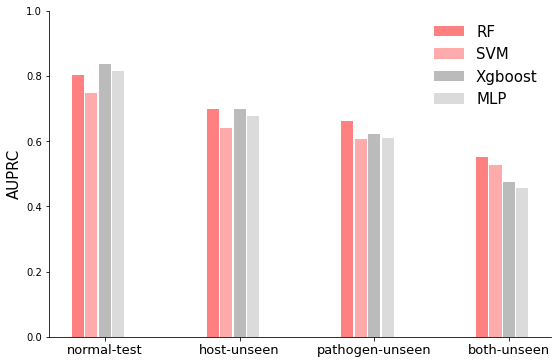

In [6]:
RF_c1  = []
RF_c2h = []
RF_c2p = []
RF_c3  = []

SVM_c1 = []
SVM_c2h = []
SVM_c2p = []
SVM_c3 = []

Xgboost_c1 = []
Xgboost_c2h = []
Xgboost_c2p = []
Xgboost_c3 = []

MLP_c1 = []
MLP_c2h = []
MLP_c2p = []
MLP_c3 = []

for i in range(10):
    RF_c1.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c1_pred_{i}.txt")[:,-2:])
    RF_c2h.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    RF_c2p.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])  
    RF_c3.append(
        np.genfromtxt(f"./preds/10folds_C1223_RF_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])    
       
    Xgboost_c1.append(
         np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c1_pred_{i}.txt")[:,-2:])
    Xgboost_c2h.append(
         np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    Xgboost_c2p.append(
         np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])
    Xgboost_c3.append(
         np.genfromtxt(f"./preds/10folds_C1223_Xgboost_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])
    
    MLP_c1.append(
         np.genfromtxt(f"./preds/10folds_C1223_NN_EsmMean_AraNetStruc2vec/c1_pred_{i}.txt")[:,-2:])
    MLP_c2h.append(
         np.genfromtxt(f"./preds/10folds_C1223_NN_EsmMean_AraNetStruc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    MLP_c2p.append(
         np.genfromtxt(f"./preds/10folds_C1223_NN_EsmMean_AraNetStruc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])
    MLP_c3.append(
         np.genfromtxt(f"./preds/10folds_C1223_NN_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])
    
    SVM_c1.append(
         np.genfromtxt(f"./preds/10folds_C1223_SVM_EsmMean_AraNetStruc2vec/c1_pred_{i}.txt")[:,-2:])
    SVM_c2h.append(
         np.genfromtxt(f"./preds/10folds_C1223_SVM_EsmMean_AraNetStruc2vec/c2_host_unseen_pred_{i}.txt")[:,-2:])
    SVM_c2p.append(
         np.genfromtxt(f"./preds/10folds_C1223_SVM_EsmMean_AraNetStruc2vec/c2_pathogen_unseen_pred_{i}.txt")[:,-2:])
    SVM_c3.append(
         np.genfromtxt(f"./preds/10folds_C1223_SVM_EsmMean_AraNetStruc2vec/c3_pred_{i}.txt")[:,-2:])
    
data = [
    RF_c1 ,
    RF_c2h,
    RF_c2p,
    RF_c3 ,

    SVM_c1 ,
    SVM_c2h ,
    SVM_c2p ,
    SVM_c3 ,

    Xgboost_c1 ,
    Xgboost_c2h ,
    Xgboost_c2p ,
    Xgboost_c3,

    MLP_c1 ,
    MLP_c2h ,
    MLP_c2p ,
    MLP_c3 ,
]
AuPRCs = []
for i in range(4):
    AuPRC = []
    for j in np.arange(i*4,(i+1)*4):
        tmp = np.mean([multi_scores(data[j][_][:,0],data[j][_][:,1])[-2] for _ in range(10)])
        AuPRC.append(tmp)
        
    AuPRCs.append(AuPRC)


import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(9,6))

#set title
# ax.set_title("Model Ablation",fontdict={"fontsize":15},y=1.05)
ax.set_xlabel("",fontdict={"fontsize":15})
ax.set_ylabel("AUPRC",fontdict={"fontsize":15})
ax.set_ylim(0,1)
ax.set_xticks(np.arange(4))
ax.set_xticklabels(('normal-test', 'host-unseen', 'pathogen-unseen', 'both-unseen'),fontdict={"fontsize":13},
                   rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
labels = ["RF",
          "SVM",
          "Xgboost",
          "MLP",
          "AraNetStruc2vec",
          "EsmMean prottrans",
          "EsmMean prottrans AraNetStruc2vec"]

colors = ["#FF8080",'#FFABAB',
          "#BBBBBB","#DBDBDB",
          '#00DBDB','#00ABAB',"#FFABAB",'#B0DBDB',
          ]
for i in np.arange(0,4):
    ax.bar(np.arange(4)+0.1*i-0.2,AuPRCs[i],width=0.09,label=labels[i],color=colors[i])

# plt.legend(fontsize=15,shadow=False,framealpha=0, bbox_to_anchor=(0.95, 1.0, ),ncol=4)
plt.legend(fontsize=15,shadow=False,framealpha=0 )
plt.savefig('./pics/Figure2_C_ML_comparation.svg', dpi=600,bbox_inches = 'tight',format="svg")